**Грамматический анализатор**

Евгений Борисов <esborisov@sevsu.ru>

синтаксический парсер для русского языка, библиотека Yargy

---

In [1]:
# !pip install natasha

In [2]:
from yargy import rule # последовательность грамматических шаблонов
from yargy.predicates import gram # шаблоны для частей речи
from yargy.predicates import dictionary # фиксированный список токенов

ADJF = gram('ADJF') # прилагательное
OBJ = dictionary({'сок', 'морс', 'компот'})  # существительное из списка
SEP = dictionary({',', 'и'}) # разделитель объектов
ENT = rule( ADJF, OBJ, SEP.optional() ) # описание объекта

S = ENT.repeatable() # список описаний объектов
    
display(S.normalized.as_bnf)

R0 -> R1 R0 | gram(value='ADJF') dictionary(...) R2
R1 -> gram(value='ADJF') dictionary(...) R2
R2 -> e | dictionary(...)


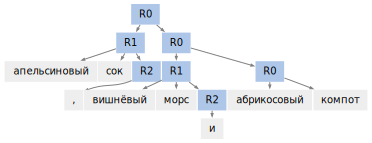

In [3]:
from ipymarkup import show_span_box_markup as show_markup
from yargy import Parser

sentens = 'В заказ на доставку входили апельсиновый сок, вишнёвый морс и абрикосовый компот.'

parser = Parser(S)
matches = list(parser.findall(sentens))
spans = [_.span for _ in matches]
show_markup(sentens, spans)

for m in matches: 
    display(m.tree.as_dot)